# Prostý krut#

$$D.T.$$

Načítanie potrebných knižníc

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

## Príklad 1 ##

Na vnútornú trúbku skrucovanú silovou dvojicou $M$ privaríme podľa obrázku vonkajšiu trúbku a vnútornú trúbku odľahčíme. Obidve trúbky sú z materiálu 11 373. Určite bezpečnosť trúbiek vzhľadom k medznému stavu pružnosti.

Dané:
\begin{align*}
l = & \,500\, mm\\
M = & \,300\, Nm\\
d_1 = & \,40\, mm\\
d_2 = & \,45\, mm\\
d_3 = & \,50\, mm\\
\sigma_K = & \,250\, MPa\\
\end{align*}

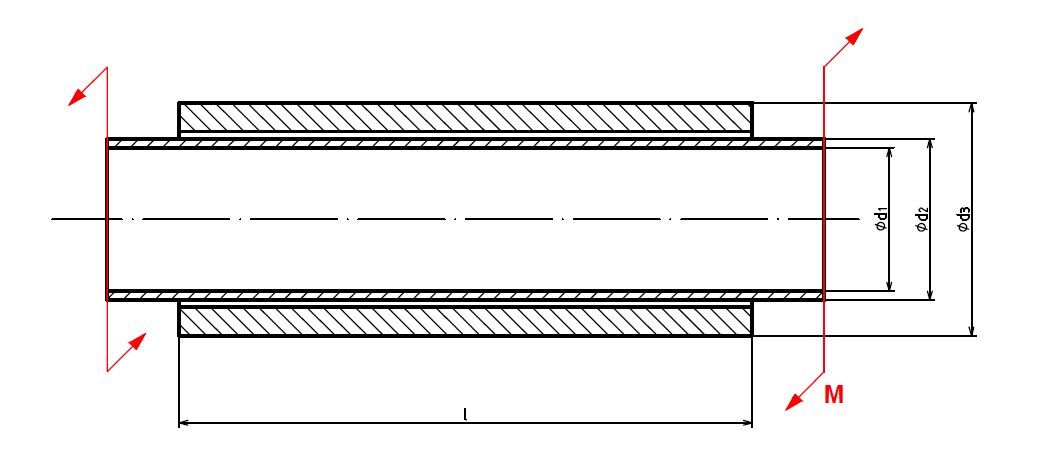

In [2]:
Image(filename='Krut1a.PNG', width=800, height=400)

Pred zvarením tvoria trúbky samostatné telesá, pričom vonkajšia je nezaťažená a vnútorná je zaťažená silovo.
Po zvarení sa nič nemení až do chvíle, keď odľahčíme vnútornú trúbu, vtedy nastane vzájomné ovplyvňovanie oboch trubiek a v tomto dôsledku budú
obe zaťažené deformačne. V miestach zvarov budú pôsobiť momenty $M_1$ a $M_2$.

Trúbky sú teda po zvarení a odľahčení zaťažené silovými dvojicami $M_1$ a $M_2$, ktoré ležia v rvnakej rovine. K dispozícii je teda jedna použiteľná podmenka rovnováhy: $$ $\sum M_x=0 :\,\, M_1 - M_2 = 0 $$ odkiaľ vyplýva:  $$M_1 = M_2$$

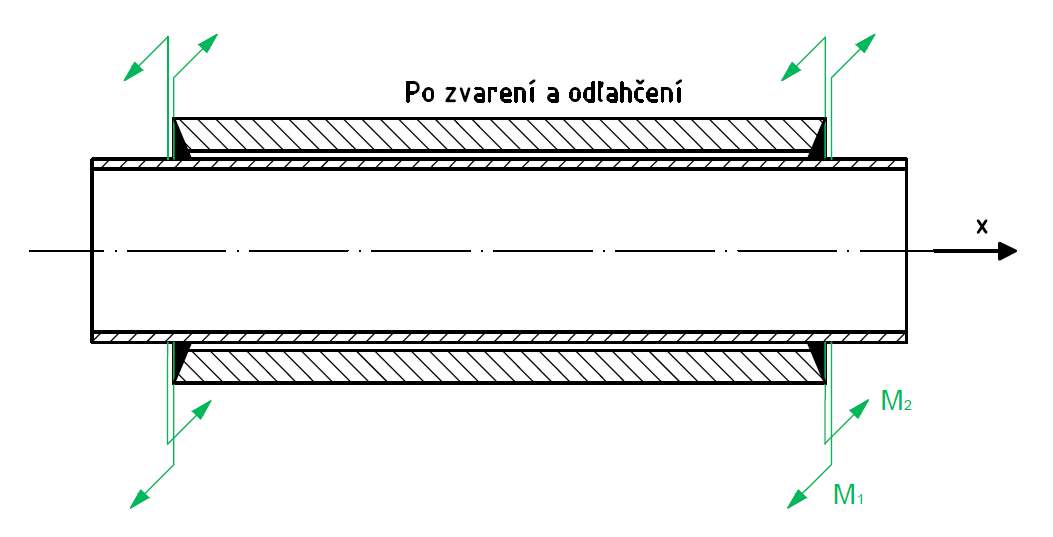

In [3]:
Image(filename='Krut1b.PNG', width=800, height=400)

Zavedenie symbolov pre dané veličiny

In [4]:
M,E,mi=sp.symbols('M E mu')
l,d1,d2,d3=sp.symbols('l d_1 d_2 d_3')
Mk1, Mk2 = sp.symbols('M_{k_1} M_{k_2}')
sigmak=sp.symbols('sigma_K')

Vyjadenie polárnych momentov pre obe trúbky

In [5]:
Jp1=(sp.pi*d2**4)/32 - (sp.pi*d1**4)/32
Jp2=(sp.pi*d3**4)/32 - (sp.pi*d2**4)/32
Jp1.simplify(), Jp2.simplify()

Vyjadrenie modulu pružnosti v šmyku $G$, v tvare $$G = \frac{E}{2(1+\mu)}$$

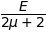

In [6]:
G=E/(2*(1+mi))
G

Zo statického rozboru vyplýva, že úloha je jedenkrát staticky neurčitá a je nutné zaviezť väzbovú podmienku v tvare $$\varphi_{01}=\varphi_1 + \varphi_2$$

kde $\varphi_{01}$ je natočenie vnútornej trúbky pred zvarením spôsobené zaťažením silovou dvojicou $M$ a $\varphi_{1/2}$ sú jednotlivé natočenia vnútornej a vonkajšej trúbky po zvarení a odľahčení

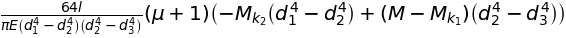

In [7]:
rovnica1= - M*l/(G*Jp1) + Mk1*l/(G*Jp1) + Mk2*l/(G*Jp2)
rovnica2= Mk2 - Mk1
rovnica1.simplify()

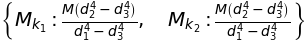

In [8]:
vysledok=sp.solve([rovnica1,rovnica2],[Mk1,Mk2])
vysledok

### Bezpečnosť vnútornej trúbky ###

Vyjadrenie maximálnej hodnoty dovoleného šmykového napätia $\tau_K$, modulu prierezu v krute vnútornej trúbky $W_{k_1}$ a hodnoty napätia v mieste zvaru na vnútornej trúbke $\tau_{ex_1}$

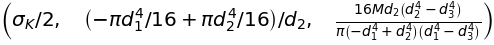

In [9]:
M_k1=vysledok[Mk1]
tauk=sigmak/2
Wk1=Jp1/(d2/2)
tauex1=M_k1/Wk1.simplify()
tauk,Wk1,tauex1

Vyjadrenie bezpečnosti v tvare $$k_{k_1} = \frac{\tau_K}{\tau_{ex_1}}$$

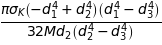

In [10]:
kk1=tauk/tauex1
kk1.factor(kk1)

### Bezpečnosť vonkajšej trúbky ###

Vyjadrenie modulu prierezu v krute $W_{k_2}$ a hodnoty maximálneho napätia $\tau_{ex_2}$

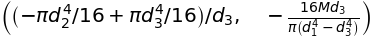

In [11]:
M_k2=vysledok[Mk2]
Wk2=Jp2/(d3/2)
tauex2=M_k2/Wk2.simplify()
Wk2,tauex2.simplify()

Vyjadrenie bezpečnosti v tvare $$k_{k_2} = \frac{\tau_K}{\tau_{ex_2}}$$

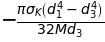

In [12]:
kk2=tauk/tauex2
kk2.simplify()

Dosadenie čísel pre numerický výpočet

In [13]:
d1_,d2_,d3_=0.04,0.045,0.05
l_=0.5
M_,E_,mi_=300.,2.1e11,0.3
sigmak_=250e6

Vyčíslenie hodnoty krútiacich momentov $M_{k_1}$ a $M_{k_2}$

In [14]:
Mk1_=vysledok[Mk1].subs({M:M_,d1:d1_,d2:d2_,d3:d3_})
Mk2_=vysledok[Mk2].subs({M:M_,d1:d1_,d2:d2_,d3:d3_})
round(float(Mk1_),3), round(float(Mk2_),3)

Vyčíslenie bezpečnosti vnútornej trúbky

In [15]:
kk1_=float(kk1.subs({sigmak:sigmak_,M:M_,d1:d1_,d2:d2_,d3:d3_}))
kk1_

Vyčíslenie bezpečnosti vonkajšej trúbky

In [16]:
kk2_=float(kk2.subs({sigmak:sigmak_,M:M_,d1:d1_,d2:d2_,d3:d3_}))
kk2_

Ako vidíme, vnútorná trúbka má menšiu bezpečnosť ako vonkajšia trúbka.